In [22]:
# Here we have to import the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
df.info()
# we don't have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [25]:
df.shape
# we have 110527 rows and 14 columns

(110527, 14)

In [26]:
df.describe() 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


here we realize that the maximum age in our data is 115.000000
and it makes sense but the minimum = -1.000000 and it is not a logical number.
also average age for patients = 37.088874

In [27]:
df.duplicated().sum()
# there's no duplicates in the data

0

In [28]:
df.duplicated(['PatientId']).sum() 

48228

there were 48228 patients had more than one appointment 

In [29]:
df.duplicated(['PatientId','No-show']).sum() 

38710

 there's 38710 were repeated so we should remove them

In [30]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [31]:
df.Gender.value_counts()  

F    71840
M    38687
Name: Gender, dtype: int64

female patients are more than male patients

In [32]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


 Here we won't use PatientId,AppointmentID or ScheduledDay because it won't be helpful 

### Data Cleaning
Here we will remove data which we don't need and edit some objects

In [33]:
df['Age'] = df['Age'].apply(lambda x : x if x > 0 else 0)

In [34]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We equaled any value less than zero to zero for removing any minus value in the data

In [35]:
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [36]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


We edited the columns names to make it easer dealing with data

In [37]:
df.drop_duplicates(['PatientId','No_show'],inplace= True)

In [38]:
df.duplicated(['PatientId','No_show']).sum()

0

In [39]:
df.drop(["AppointmentID","PatientId","ScheduledDay"], axis=1, inplace=True)
df.head(1)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


We droped all the repeated values for 'PatientId' and 'No_show' columns and We removed columns that we don't need so that we make the best use of the rest of the columns

## Exploratory Data Analysis


In [40]:
df["No_show"].replace({"No": "Committed", "Yes": "Uncommitted"}, inplace=True)
df.head(1)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Committed


We changed the variables names to be more clear specialy in charts

### Research Question 1 (Does a specific gender help us to predict?)

In [41]:
df_Q1 = df.groupby(['Gender']).No_show.value_counts().unstack()
df_Q1

No_show,Committed,Uncommitted
Gender,,
F,34961,11506
M,19193,6157


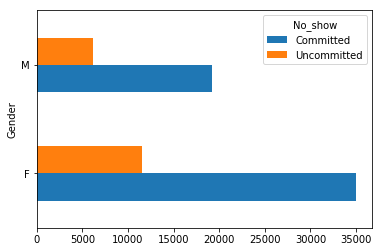

In [43]:
df_Q1.plot(kind="barh", fontsize=10)

Females who were committed are more than males but there's no strong relationship that enables us tp predict  

### Research Question 2  (Does a specific AppointmentDay helps us to predict?)

In [45]:
df_Q2 = df.AppointmentDay.value_counts()
df_Q2

2016-05-16T00:00:00Z    3237
2016-05-09T00:00:00Z    3198
2016-05-30T00:00:00Z    3122
2016-05-02T00:00:00Z    3111
2016-05-17T00:00:00Z    3082
2016-05-11T00:00:00Z    3070
2016-05-03T00:00:00Z    3045
2016-05-10T00:00:00Z    3033
2016-04-29T00:00:00Z    3018
2016-05-12T00:00:00Z    3001
2016-05-18T00:00:00Z    2946
2016-05-05T00:00:00Z    2945
2016-05-31T00:00:00Z    2918
2016-05-19T00:00:00Z    2916
2016-05-04T00:00:00Z    2905
2016-05-24T00:00:00Z    2742
2016-05-25T00:00:00Z    2561
2016-05-13T00:00:00Z    2549
2016-05-06T00:00:00Z    2504
2016-05-20T00:00:00Z    2463
2016-06-06T00:00:00Z    2440
2016-06-07T00:00:00Z    2269
2016-06-08T00:00:00Z    2246
2016-06-01T00:00:00Z    2208
2016-06-02T00:00:00Z    2196
2016-06-03T00:00:00Z    2064
2016-05-14T00:00:00Z      28
Name: AppointmentDay, dtype: int64

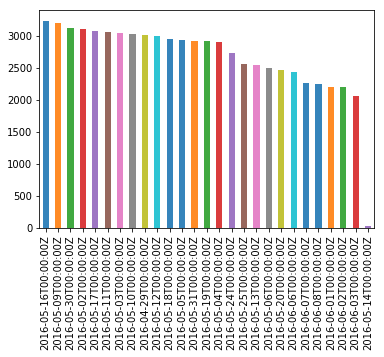

In [65]:
df_Q2.plot(x="AppointmentDay", y=["number of attendence"], kind="bar", alpha=0.9)

The day which most patients was committed in was 16-05-2016 but it doesn't give us a strong relationship because it seems like attendence in the days is almost close

### Research Question 3  (Does a specific Age helps us to predict?)

In [70]:
df_Q3 = df.groupby('No_show')['Age'].mean()
df_Q3

No_show
Committed      37.228478
Uncommitted    34.376267
Name: Age, dtype: float64

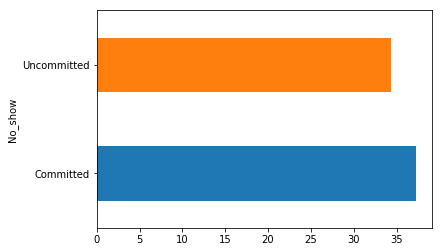

In [71]:
df_Q3.plot(kind="barh", fontsize=10)

No strong relationship helps us to predict

### Research Question 4  (Does a specific Neighbourhood helps us to predict?)

In [75]:
df_Q4 = df.Neighbourhood.value_counts()
df_Q4

JARDIM CAMBURI                 4800
MARIA ORTIZ                    3845
RESISTÊNCIA                    2780
JARDIM DA PENHA                2696
ITARARÉ                        2470
CENTRO                         2165
TABUAZEIRO                     2121
SANTA MARTHA                   1981
SANTO ANTÔNIO                  1879
BONFIM                         1834
JESUS DE NAZARETH              1755
CARATOÍRA                      1703
JABOUR                         1635
SANTO ANDRÉ                    1594
SÃO PEDRO                      1570
NOVA PALESTINA                 1547
DA PENHA                       1490
GURIGICA                       1387
ANDORINHAS                     1366
ILHA DO PRÍNCIPE               1343
ROMÃO                          1307
BELA VISTA                     1293
SÃO CRISTÓVÃO                  1240
SÃO JOSÉ                       1213
MARUÍPE                        1207
ILHA DE SANTA MARIA            1123
FORTE SÃO JOÃO                 1093
SÃO BENEDITO                

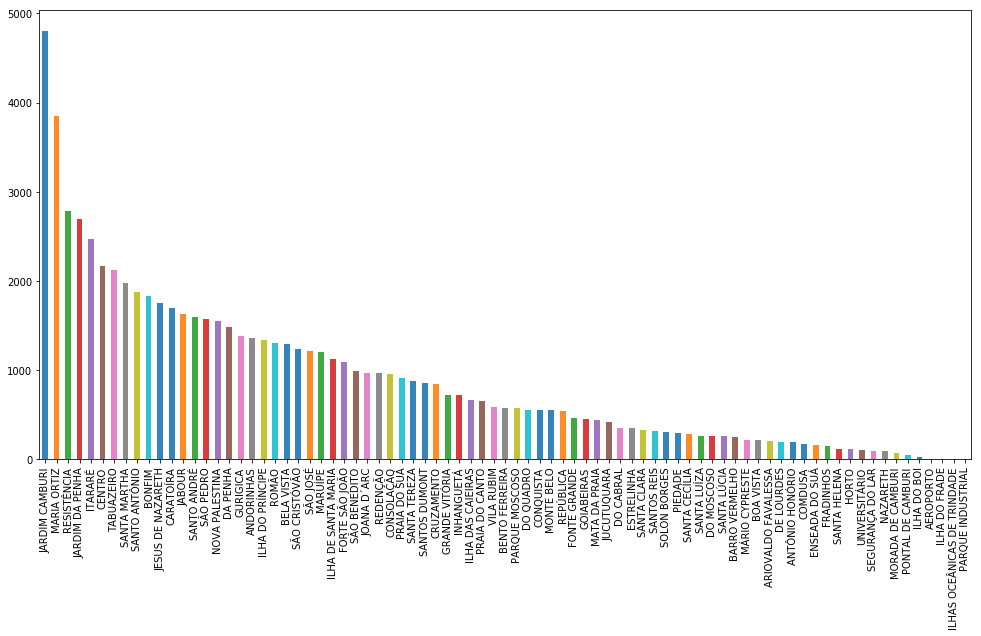

In [78]:
plt.figure(figsize=[16.70, 8.27])
df_Q4.plot(x="Neighbourhood", y=["number of attendence"], kind="bar", alpha=0.9)

It seems that (jarom camburi) gives us a strong relationship 

### Research Question 5  (Does a specific  Neighbourhood helps us to predict?)

In [79]:
df_Q5 = df.groupby(['Scholarship']).No_show.value_counts().unstack()
df_Q5

No_show,Committed,Uncommitted
Scholarship,,
0,49208,15748
1,4946,1915


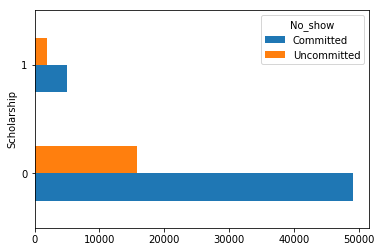

In [80]:
df_Q5.plot(kind="barh", fontsize=10)

No strong relationship helps us to predict

### Research Question 6 (Does a specific SMS_received helps us to predict?)


In [81]:
df_Q6 = df.groupby(['SMS_received']).No_show.value_counts().unstack()
df_Q6

No_show,Committed,Uncommitted
SMS_received,,
0,38058,9660
1,16096,8003


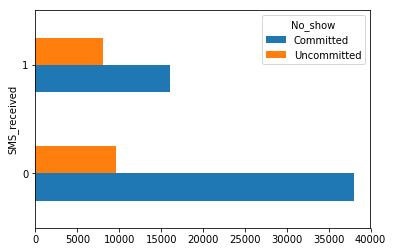

In [82]:
df_Q6.plot(kind="barh", fontsize=10)

people who didn't get SMS more than people who get it but no strong relationship helps us to predict

### Research Question 7 (Does a specific Handcap helps us to predict?)

In [83]:
df_Q7 = df.groupby(['Handcap']).No_show.value_counts().unstack()
df_Q7

No_show,Committed,Uncommitted
Handcap,,
0,53127,17385
1,931,247
2,89,27
3,5,3
4,2,1


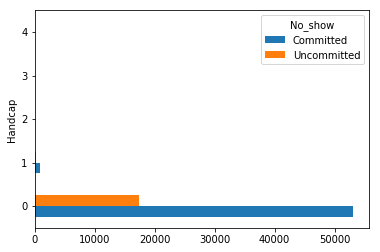

In [84]:
df_Q7.plot(kind="barh", fontsize=10)

Patients who didn't had any Handcapes were more commited but we can't take this as a factor to predict because most of the patients were't have any handcapes 

## Conclusions
1- the only factor that can helps us o predict about the data is (Neighbourhood) we don't know any specific reasons for that but most of the patients who were committed went to (jarom camburi)

2- Females who were committed are more than males nut it doesn't give us any strong relationship

3- The day which most patients was committed in was 16-05-2016 but it doesn't give us a strong relationship because it seems like attendence in the days is almost close

4- The average age for those who were committed was almost 37 years old and for those who were uncommitted was almost 34 but it doesn't it's not a factor that can help us because the two numbers are very close.

5- Patients who didn't had the scholarship were more committed but it doesn't help us to predict 

6- patients who didn't recieved SMS and were committed more than patients who recieved the SMS


### Limitations
Gender,SMS_received,Age,scholarship and appointment day didn't have any strong relationship that enables us to predict if the petients will be committed or not

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255